<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="120" /></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing & Upgrading Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)
  - **5.2** [**Data Cleaning**](#Section52)
  - **5.2** [**Data Post-profiling**](#Section53)

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-profiling**](#Section7)<br>
  - **7.1** [**Feature Encoding**](#Section71)
  - **7.2** [**Feature Scaling**](#Section72)
  - **7.3** [**Feature Selection**](#Section73)
  - **7.4** [**Data Preparation**](#Section74)

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Baseline Models**](#Section81)
  - **8.2** [**Oversampled Models**](#Section82) 

**9.** [**Conclusion**](#Section9)<br>

---
<a name=Section1 id=Section1></a>
# **1. Introduction**
---

- Employment **scams** are on the **rise** leading to high **unemployment** in the market. 

- Moreover, the **2019 pandemic** has made a significant **impact** on the **job market** and **job loss** for many individuals.

- Such a scenario has **provoked** the **scammers** and created **opportunities** to make this worse.

<center><img src = "https://1.bp.blogspot.com/-zLDFegZRN90/Xm-4ntg3wMI/AAAAAAAAAHc/vixIwZFGHaYRxBA_wfch27_a0EHdRA8xgCLcBGAsYHQ/w1200-h630-p-k-no-nu/ONLINE-JOB-SEARCH.png"></center>

---
<a name=Section2 id=Section2></a>
# **2. Problem Statement**
---

- Many people are falling **prey** to job **scammers** using the **desperation** caused by an unprecedented incident. 

- Most scammers do this to get **personal information** from the person they are scamming.

- This is a **dangerous problem** which we can address through Machine Learning techniques.

<center><img src="https://www.lavoroediritto.it/wp-content/uploads/2019/08/bugia-falso-indennita-povero-nullatenente-abuso-permesso-1280x720.jpg"></center>

---
<a name=Section3 id=Section3></a>
# **3. Installing & Importing Libraries**
---

<a name=Section31 id=Section31></a>
### **3.1 Installing & Upgrading Libraries**

In [ ]:
!pip install -q --upgrade datascience                               # Package that is required by pandas profiling
!pip install -q --upgrade pandas-profiling                          # Library to generate basic statistics about data
!pip install -q --upgrade yellowbrick                               # Toolbox for Measuring Machine Performance

<a name=Section32 id=Section32></a>
### **3.2 Importing Libraries**

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # To perform data profiling
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # For numerical python operations
#-------------------------------------------------------------------------------------------------------------------------------
from matplotlib import pyplot as plt                                # To use matplotlib's pyplot interface
import seaborn as sns                                               # For attractive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing standard scaler to perform standardization
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.base import BaseEstimator                              # To create custom transformers
from sklearn.base import ClassifierMixin                            # To create custom transformers
from sklearn.base import TransformerMixin                           # To create custom transformers
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances          # To select important features out of the model
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.model_selection import KFold                           # To perform K-fold executions
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # To estimate accuracy of the model
from sklearn.metrics import precision_score                         # To estimate preicsion of the class
from sklearn.metrics import recall_score                            # To estimate recall of the class
from sklearn.metrics import f1_score                                # To estimate f1-score of the class
from imblearn.over_sampling import SMOTE                            # To perform oversampling over the data
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression                 # To create a logistic model
from sklearn.linear_model import SGDClassifier                      # To create a SGD-based model
from sklearn.ensemble import RandomForestClassifier                 # To generate random forest model
from xgboost import XGBClassifier                                   # To generate xgb classifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name=Section4 id=Section4></a>
# **4. Data Acquisition & Wrangling**
---

- This dataset contains 18K job descriptions out of which about 800 are fake. 

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 17880 | 18 | 47.7 MB |

| ID | Feature          | Description                                    | # | ID | Feature              | Description                                    |
| -- | ---------------- | ---------------------------------------------- | - | -- | -------------------- | ---------------------------------------------- |
| 1  | job\_id          | Unique Job ID                                  | # | 10 | telecommuting        | True for telecommuting positions.              |
| 2  | title            | The title of the job ad entry                  | # | 11 | has\_company\_logo   | True if company logo is present.               |
| 3  | location         | Geographical location of the job ad.           | # | 12 | has\_questions       | True if screening questions are present.       |
| 4  | department       | Corporate department (e.g. sales).             | # | 13 | employment\_type     | Full-type, Part-time, Contract, etc.           |
| 5  | salary\_range    | Indicative salary range (e.g. \$50,000-\$60,000) | # | 14 | required\_experience | Executive, Entry level, Intern, etc.           |
| 6  | company\_profile | A brief company description.                   | # | 15 | required\_education  | Doctorate, Master’s Degree, Bachelor, etc.     |
| 7  | description      | The details description of the job ad.         | # | 16 | industry             | Automotive, IT, Health care, Real estate, etc. |
| 8  | requirements     | Enlisted requirements for the job opening.     | # | 17 | function             | Consulting, Engineering, Research, Sales etc.  |
| 9  | benefits         | Enlisted offered benefits by the employer.     | # | 18 | fraudulent           | target - Classification attribute.             |

**Source:** Click <a href="https://github.com/insaid2018/project-gallery/raw/main/data/fake_job_postings.zip">**here**</a> to download file

In [64]:
filepath = 'fake_job_postings.csv'
data = pd.read_csv(filepath_or_buffer=filepath)
print('Data Shape:', data.shape)
data.head(1)

Data Shape: (17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.","Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff","Experience with content management systems a major plus (any blogging counts!)Familiar with the Food52 editorial voice and aestheticLoves food, appreciates the importance of home cooking and cooking with the seasonsMeticulous editor, perfectionist, obsessive attention to detail, maddened by typos and broken links, delighted by finding and fixing themCheerful under pressureExcellent communication skillsA+ multi-tasker and juggler of responsibilities big and smallInterested in and engaged with social media like Twitter, Facebook, and PinterestLoves problem-solving and collaborating to drive Food52 forwardThinks big picture but pitches in on the nitty gritty of running a small company (dishes, shopping, administrative support)Comfortable with the realities of working for a startup: being on call on evenings and weekends, and working long hours",NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0


<a name=Section41 id=Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


<a name=Section42 id=Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
data.info(verbose=True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

**Observation:**

- We can observe that there are **null values** in the dataset but we have to **check for duplicates**.

- As far as incorrect data types of feature is concerned we need to analyze which will do in upcoming section.


<a name=Section5 id=Section5></a>

---
# **5. Data Pre-Processing**
---

<a name=Section51 id=Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates a **profile report** from a pandas DataFrame.

- For each column, statistics are presented in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations:**

- The report shows that there are **overall 18 features**, out of which **1 is numeral**, **17 are categorical** types.

- There exist **70103 missing values (21.8%)** but **no duplicate values** are present.

| ID | Feature          | Missing Count | Missing Percentage | Data Type   | # | ID | Feature              | Missing Count | Missing Percentage | Data Type   |
| -- | ---------------- | ------------- | ------------------ | ----------- | - | -- | -------------------- | ------------- | ------------------ | ----------- |
| 1  | location         | 346           | 1.9%               | Categorical | # | 7  | benefits             | 7210          | 40.30%             | Categorical |
| 2  | department       | 11547         | 64.6%              | Categorical | # | 8  | employment\_type     | 3471          | 19.40%             | Categorical |
| 3  | salary\_range    | 15012         | 84.0%              | Categorical | # | 9  | required\_experience | 7050          | 39.40%             | Categorical |
| 4  | company\_profile | 3308          | 18.5%              | Categorical | # | 10 | required\_education  | 8105          | 45.3%              | Categorical |
| 5  | description      | 1             | < 0.1%             | Categorical | # | 11 | industry             | 4903          | 27.40%             | Categorical |
| 6  | requirements     | 2695          | 15.10%             | Categorical | # | 12 | function             | 6455          | 36.10%             | Categorical |

- job_id has unique and uniformly distributed values.

- We observed corrleation among features as follows:

    - employment_type is highly correlated with function

    - required_experience is highly correlated with required_education

    - function is highly correlated with employment_type


<a name=Section52 id=Section52></a>
### **5.2 Data Cleaning**

- In this section, we will perform the **cleaning** **operations** over the features using information from previous section.

In [65]:
print('Old Data Shape:', data.shape)
feature_list = ['location', 'department', 'salary_range', 'company_profile', 'requirements', 'benefits', 
             'employment_type', 'required_experience', 'required_education', 'industry', 'function']

for feature in feature_list:
    data[feature] = data[feature].replace(np.nan, 'Unavailable')

data = data.dropna(subset=['description'])

print('New Data Shape:', data.shape)

Old Data Shape: (17880, 18)
New Data Shape: (17879, 18)


<a name=Section53 id=Section53></a>
### **5.3 Data Post-Profiling**

- In this section, we will observe the changes after performing data pre-processing, if present.

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observation:**

- We can observe that there are **no major changes** in the dataset.

- We have rectified all the issues in the dataset.

<a name=Section6 id=Section6></a>

---
# **6. Exploratory Data Analysis**
---

- In this section, we will **analyze** the dataset to **summarize** their main **characteristics**, often using visuals.

- The **primary goal** is to **retrieve** a **maximum amount of information** from the dataset.

**Note:**

- In the real-time project, we never make use of code-based visualization because they are time-consuming.

- Instead, we make use of Business Intelligence tools such as Power BI or Tableau because they are quick to use.

- Before proceeding ahead lets drop company_profile, description, requirements because they contain text.

- In addition, we will also drop job_id as it is irrelevant for the model development.

In [66]:
data = data.drop(labels=['job_id', 'company_profile', 'description', 'requirements', 'benefits'], axis=1)

<h4><strong>Question:</strong> Which are the top 10 most frequent job roles present in the data?</h4>

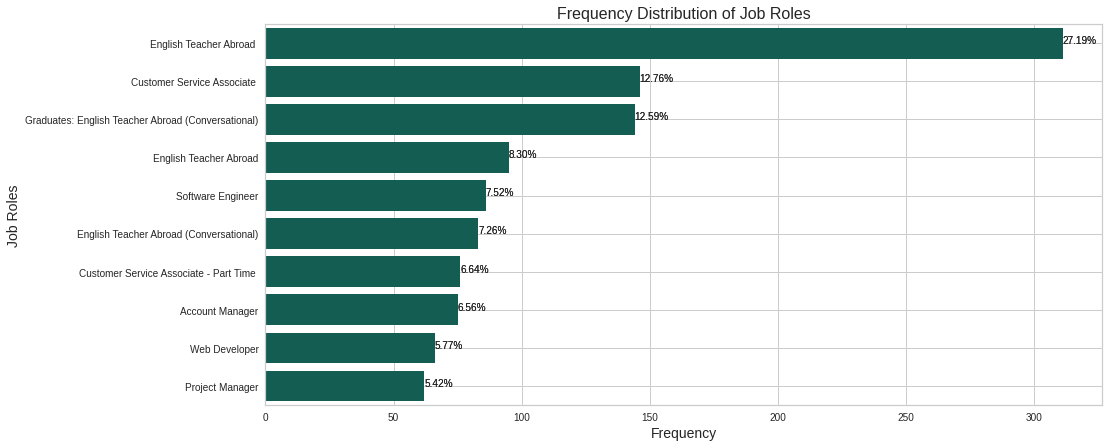

In [6]:
top_10_jobs = data['title'].value_counts()[0:10]

plt.figure(figsize=[15, 7])
ax = sns.barplot(y=top_10_jobs.index, x=top_10_jobs.values, ci=None, orient='h', color='#07695b')

# To add percentage alongside bars
total = top_10_jobs.sum()
for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_width() / total)
  x = p.get_x() + p.get_width()
  y = p.get_y() + p.get_height() / 2
  ax.annotate(percentage, (x, y))

plt.xlabel(xlabel='Frequency', size=14)
plt.ylabel(ylabel='Job Roles', size=14)
plt.title(label='Frequency Distribution of Job Roles', size=16)
plt.grid(b=True)
plt.show()

<h4><strong>Question:</strong> What is the proportion of fraudulent job and non-fraudulent jobs?</h4>

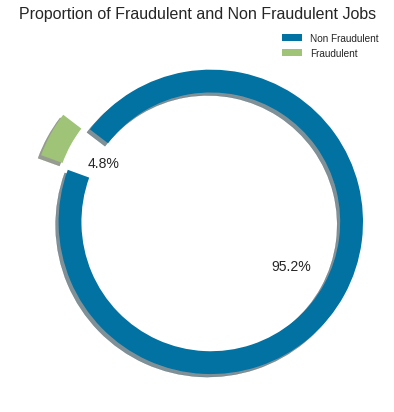

In [8]:
figure = plt.figure(figsize = [15, 7])
space = np.ones(2)/10
data['fraudulent'].value_counts().plot(kind='pie', 
                                       explode=space, 
                                       fontsize=14, 
                                       autopct='%3.1f%%', 
                                       wedgeprops=dict(width = 0.15), 
                                       shadow=True, 
                                       startangle=160, 
                                       figsize=[15, 7], 
                                       legend=True, 
                                       labels=None)
plt.legend(['Non Fraudulent', 'Fraudulent'])
plt.ylabel(ylabel='', size = 14)
plt.title(label='Proportion of Fraudulent and Non Fraudulent Jobs', size=16)
plt.show()

**Observations:**

- We can observe class imbalance in our dataset.

- We might end up getting bad results when we will develop machine models.

- To overcome the problem we will perform SMOTE over the dataset.

<h4><strong>Question:</strong> What is the frequency distribution of required education for the job roles in the market?</h4>

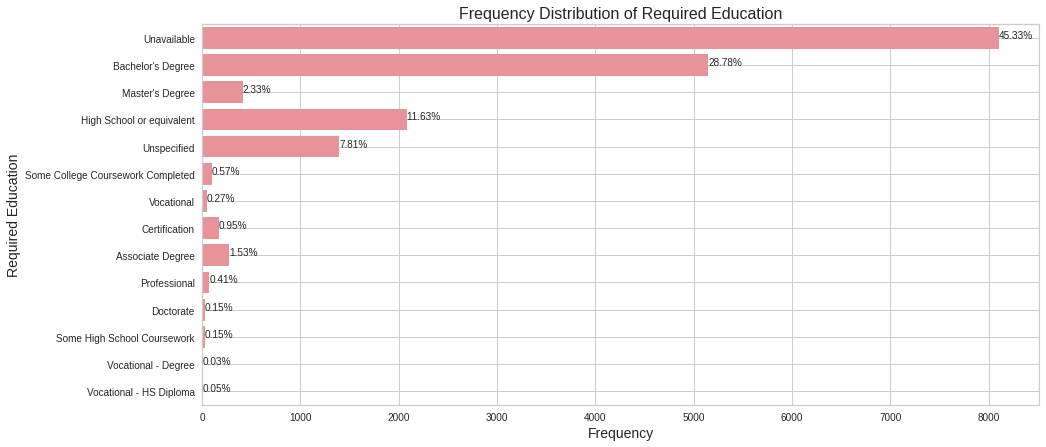

In [84]:
plt.figure(figsize=[15, 7])
ax = sns.countplot(y=data['required_education'], color='#f7838d')

# To add percentage alongside bars
total = data.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_width() / total)
  x = p.get_x() + p.get_width()
  y = p.get_y() + p.get_height() / 2
  ax.annotate(percentage, (x, y))

plt.xlabel(xlabel='Frequency', size=14)
plt.ylabel(ylabel='Required Education', size=14)
plt.title(label='Frequency Distribution of Required Education', size=16)
plt.grid(b=True)
plt.show()

<h4><strong>Question:</strong> What is the frequency distribution of required experience for the job roles in the market?</h4>

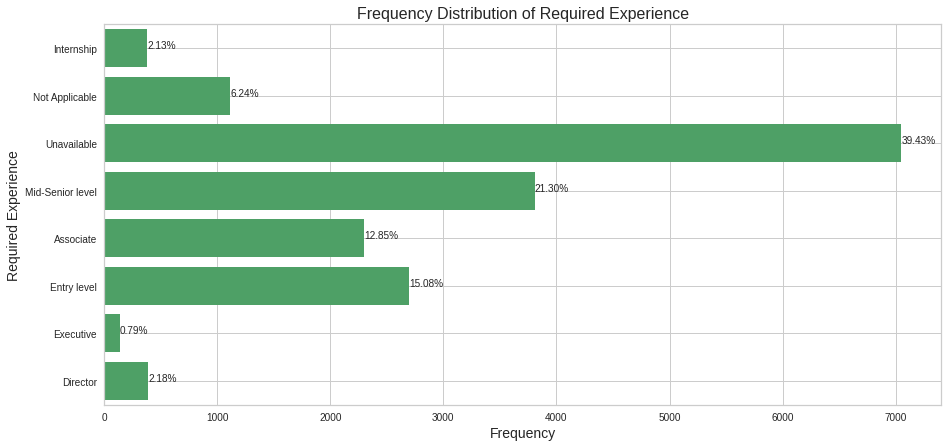

In [85]:
plt.figure(figsize=[15, 7])
ax = sns.countplot(y=data['required_experience'], color='#41ad60')

total = data.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_width() / total)
  x = p.get_x() + p.get_width()
  y = p.get_y() + p.get_height() / 2
  ax.annotate(percentage, (x, y))

plt.xlabel(xlabel='Frequency', size=14)
plt.ylabel(ylabel='Required Experience', size=14)
plt.title(label='Frequency Distribution of Required Experience', size=16)
plt.grid(b=True)
plt.show()

**Note:** 

- These were a few question that anyone can come up with and get insights out of it.

- We recommend exploring data a little more to get some more valuable insights.

<a name=Section7 id=Section7></a>

---
# **7. Data Post-Processing**
---


<a name=Section71 id=Section71></a>
### **7.1 Feature Encoding**

- Let's transform our categorical feature to numeric by performing dummy encoding over them.

In [53]:
cat_features = ['title', 'location', 'department', 'salary_range', 
                'telecommuting', 'has_company_logo', 'has_questions', 
                'employment_type', 'required_experience', 
                'required_education', 'industry', 'function']

cat_frame = pd.DataFrame(data=data[cat_features].nunique().values, index=cat_features)
cat_frame.T

,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,11231,3106,1338,875,2,2,2,6,8,14,132,38


**Observations:**

- We can observe that majority of features are highly cardinal in nature.

- We will perfom dummy encoding for telecommuting, has_company_logo, has_questions, employment_type.
    - But we need to change the type of the features to string first to encode them. 

- For rest of the features we will perform k fold target encoding.

In [54]:
data['telecommuting'] = data['telecommuting'].astype(str)
data['has_company_logo'] = data['has_company_logo'].astype(str)
data['has_questions'] = data['has_questions'].astype(str)

In [38]:
class KFoldTargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, colnames , targetName, n_fold=5, verbosity=True, 
                 discardOriginal_col=False, shuffle=False, random_state=None):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits=self.n_fold, shuffle=self.shuffle, random_state=self.random_state)
        col_mean_name = self.colnames + '_' + 'Enc'
        X[col_mean_name] = np.nan
        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())
            X[col_mean_name].fillna(mean_of_target, inplace = True)
        if self.verbosity:
            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.' \
                  .format(col_mean_name, 
                          self.targetName, 
                          np.corrcoef(X[self.targetName].values, 
                                      encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.colnames, axis=1)
        return X

In [55]:
cat_features = ['title', 'location', 'department', 'salary_range', 'required_experience', 'required_education', 'industry', 'function']

data = pd.get_dummies(data=data, columns=['telecommuting', 'has_company_logo', 'has_questions', 'employment_type'])

# Performing KFold target encoding over years in current job & purpose
for col in list(cat_features):
    kfold_te = KFoldTargetEncoder(colnames=col, targetName='fraudulent', discardOriginal_col=True)
    data = kfold_te.fit_transform(X=data)


print('Encoding Suceess!!!')
data.head()

Correlation between the new feature, title_Enc and, fraudulent is 0.5595635365188784.
Correlation between the new feature, location_Enc and, fraudulent is 0.3612720405273278.
Correlation between the new feature, department_Enc and, fraudulent is 0.34674470962272946.
Correlation between the new feature, salary_range_Enc and, fraudulent is 0.21002638579775465.
Correlation between the new feature, required_experience_Enc and, fraudulent is -0.002238825743909156.
Correlation between the new feature, required_education_Enc and, fraudulent is 0.09151404245638554.
Correlation between the new feature, industry_Enc and, fraudulent is 0.23239657532283134.
Correlation between the new feature, function_Enc and, fraudulent is 0.08744230064725088.
Encoding Suceess!!!


,fraudulent,telecommuting_0,telecommuting_1,has_company_logo_0,has_company_logo_1,has_questions_0,has_questions_1,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,employment_type_Unavailable,title_Enc,location_Enc,department_Enc,salary_range_Enc,required_experience_Enc,required_education_Enc,industry_Enc,function_Enc
0,0,1,0,0,1,1,0,0,0,1,0,0,0,0.000000,0.037951,0.006173,0.046893,0.023891,0.060875,0.063242,0.014903
1,0,1,0,0,1,1,0,0,1,0,0,0,0,0.048381,0.000000,0.000000,0.046893,0.064200,0.060875,0.059271,0.060389
2,0,1,0,0,1,1,0,0,0,0,0,0,1,0.048381,0.000000,0.049435,0.046893,0.066940,0.060875,0.063242,0.057460
3,0,1,0,0,1,1,0,0,1,0,0,0,0,0.048381,0.005780,0.022936,0.046893,0.028868,0.017879,0.003594,0.032338
4,0,1,0,0,1,0,1,0,1,0,0,0,0,0.048381,0.048381,0.049435,0.046893,0.028868,0.017879,0.118863,0.003759


<a name=Section72 id=Section72></a>
### **7.2 Feature Scaling**

- Let's scale our feature to a standard scale using standard scaling.

In [56]:
X = data.drop(labels=['fraudulent'], axis=1)
y = data['fraudulent']

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_frame = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled_frame.head()

,telecommuting_0,telecommuting_1,has_company_logo_0,has_company_logo_1,has_questions_0,has_questions_1,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,employment_type_Unavailable,title_Enc,location_Enc,department_Enc,salary_range_Enc,required_experience_Enc,required_education_Enc,industry_Enc,function_Enc
0,0.211713,-0.211713,-0.507261,0.507261,0.983634,-0.983634,-0.305258,-1.362544,8.818283,-0.216003,-0.116892,-0.490736,-0.380145,-0.049505,-0.475080,-0.007395,-1.204256,0.389860,0.231829,-0.841972
1,0.211713,-0.211713,-0.507261,0.507261,0.983634,-0.983634,-0.305258,0.733921,-0.113401,-0.216003,-0.116892,-0.490736,-0.011763,-0.375950,-0.545722,-0.007395,0.780337,0.389860,0.170577,0.306313
2,0.211713,-0.211713,-0.507261,0.507261,0.983634,-0.983634,-0.305258,-1.362544,-0.113401,-0.216003,-0.116892,2.037756,-0.011763,-0.375950,0.020009,-0.007395,0.915210,0.389860,0.231829,0.232374
3,0.211713,-0.211713,-0.507261,0.507261,0.983634,-0.983634,-0.305258,0.733921,-0.113401,-0.216003,-0.116892,-0.490736,-0.011763,-0.326229,-0.283244,-0.007395,-0.959209,-0.921929,-0.688098,-0.401822
4,0.211713,-0.211713,-0.507261,0.507261,-1.016638,1.016638,-0.305258,0.733921,-0.113401,-0.216003,-0.116892,-0.490736,-0.011763,0.040213,0.020009,-0.007395,-0.959209,-0.921929,1.089644,-1.123294


<a name=Section73 id=Section73></a>
### **7.3 Feature Selection**

- Now in the real world, it is very rare that all the **features** are **important** while developing the **model**.

- Instead, we analyze the **impact** of **input** feature values over the **target** feature values.

- It is either done by performing **statistical tests** (Pearson, ANOVA, Chi-Square) or by using **Random Forest**.

- Random forests are one of the most **popular** machine learning **algorithms**.

- They provide good predictive performance, low overfitting, and easy interpretability.

- This **interpretability** is derived from the importance of each feature on the tree decision evaluated the **reduction in impurity**.

- In other words, it is **easy** to **compute** how much each feature is **contributing** to the decision.

- We will implement **SelectFromModel()** available in Sklearn which uses the base estimator to identify important features.

- The importance of a feature is determined based on a **threshold** (a measure to calculate feature importance).


In [58]:
# Have some patience, it may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
selector.fit(X_scaled_frame, y)

# Extracting list of important features
selected_feat = X_scaled_frame.columns[(selector.get_support())].tolist()

# Show total number of important features extracted by the model
print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 8
Threshold set by Model: 0.05
Important Features: ['title_Enc', 'location_Enc', 'department_Enc', 'salary_range_Enc', 'required_experience_Enc', 'required_education_Enc', 'industry_Enc', 'function_Enc']


**Visualzation of Important Features:**

- Below features are plotted against their relative importance (in %age),  of each feature.

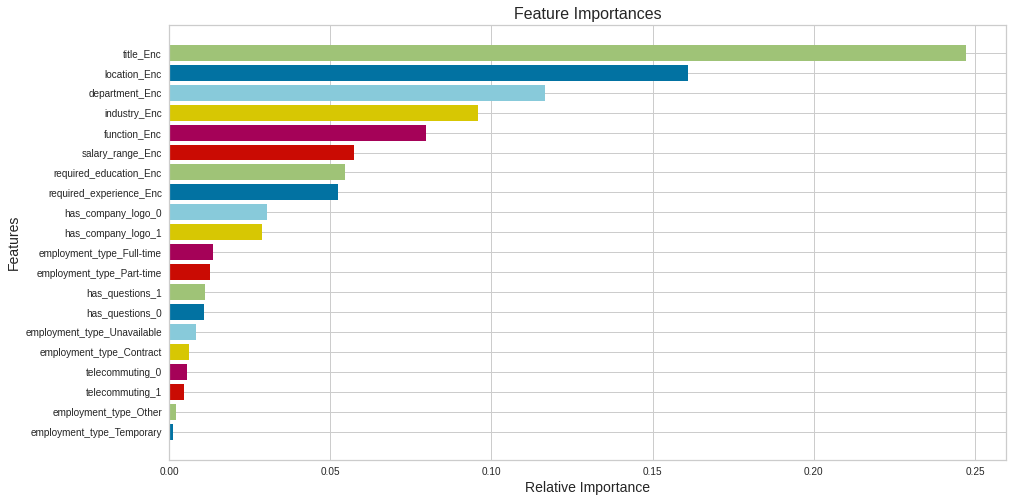

In [59]:
# Have some patience, may take some time :)
figure = plt.figure(figsize=[15, 8])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(X_scaled_frame, y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

<a name=Section74 id=Section74></a>
### **7.4 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_frame, y, test_size=0.1, random_state=42, stratify=y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (16091, 20) (16091,)
Testing Data Shape: (1788, 20) (1788,)


<a name=Section8 id=Section8></a>

---
# **8. Model Development & Evaluation**
---


<a name=Section81 id=Section81></a>

### **8.1 Baseline Models**

In [61]:
metrics = list()
clf_name = list()

classifiers = [LogisticRegression(random_state=42, class_weight='balanced'), 
               RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
               SGDClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
               XGBClassifier(random_state=42, n_jobs=-1)]

for i, classifier in enumerate(classifiers):
    classifier.fit(X_train, y_train)

    y_train_predict = classifier.predict(X_train)
    y_test_predict = classifier.predict(X_test)

    accuracy_train = str(np.round(a=accuracy_score(y_true=y_train, y_pred=y_train_predict) * 100, decimals=2)) + '%'
    accuracy_test = str(np.round(a=accuracy_score(y_true=y_test, y_pred=y_test_predict) * 100, decimals=2)) + '%'

    precision_train_0 = str(np.round(a=precision_score(y_true=y_train, y_pred=y_train_predict, pos_label=0) * 100, decimals=2)) + '%'
    precision_test_0 = str(np.round(a=precision_score(y_true=y_test, y_pred=y_test_predict, pos_label=0) * 100, decimals=2)) + '%'
    precision_train_1 = str(np.round(a=precision_score(y_true=y_train, y_pred=y_train_predict, pos_label=1) * 100, decimals=2)) + '%'
    precision_test_1 = str(np.round(a=precision_score(y_true=y_test, y_pred=y_test_predict, pos_label=1) * 100, decimals=2)) + '%'

    recall_train_0 = str(np.round(a=recall_score(y_true=y_train, y_pred=y_train_predict, pos_label=0) * 100, decimals=2)) + '%'
    recall_test_0 = str(np.round(a=recall_score(y_true=y_test, y_pred=y_test_predict, pos_label=0) * 100, decimals=2)) + '%'
    recall_train_1 = str(np.round(a=recall_score(y_true=y_train, y_pred=y_train_predict, pos_label=1) * 100, decimals=2)) + '%'
    recall_test_1 = str(np.round(a=recall_score(y_true=y_test, y_pred=y_test_predict, pos_label=1) * 100, decimals=2)) + '%'

    f1_train_0 = str(np.round(a=f1_score(y_true=y_train, y_pred=y_train_predict, pos_label=0) * 100, decimals=2)) + '%'
    f1_test_0 = str(np.round(a=f1_score(y_true=y_test, y_pred=y_test_predict, pos_label=0) * 100, decimals=2)) + '%'
    f1_train_1 = str(np.round(a=f1_score(y_true=y_train, y_pred=y_train_predict, pos_label=1) * 100, decimals=2)) + '%'
    f1_test_1 = str(np.round(a=f1_score(y_true=y_test, y_pred=y_test_predict, pos_label=1) * 100, decimals=2)) + '%'

    metrics.append([accuracy_train, accuracy_test, precision_train_0, precision_test_0, 
                    precision_train_1, precision_test_1, recall_train_0, recall_test_0, 
                    recall_train_1, recall_test_1, f1_train_0, f1_test_0, f1_train_1, f1_test_1])
    clf_name.append(classifier.__class__.__name__)

columns = ['Accuracy (Train)', 'Accuracy (Test)', 'Precision [0] (Train)', 'Precision [0] (Test)', 
           'Precision [1] (Train)', 'Precision [1] (Test)', 'Recall [0] (Train)', 'Recall [0] (Test)', 
           'Recall [1] (Train)', 'Recall [1] (Test)',  'F1-Score [0] (Train)', 'F1-Score [0] (Test)', 
           'F1-Score [1] (Train)', 'F1-Score [1] (Test)']
result_frame = pd.DataFrame(data=metrics, index=clf_name, columns=columns)
result_frame.T

,LogisticRegression,RandomForestClassifier,SGDClassifier,XGBClassifier
Accuracy (Train),87.84%,99.52%,87.1%,98.06%
Accuracy (Test),89.26%,97.93%,87.64%,98.04%
Precision [0] (Train),99.25%,99.97%,98.79%,98.22%
Precision [0] (Test),99.35%,98.54%,98.81%,98.15%
Precision [1] (Train),26.71%,91.37%,24.31%,93.47%
Precision [1] (Test),29.73%,83.78%,25.37%,94.83%
Recall [0] (Train),87.89%,99.52%,87.51%,99.77%
Recall [0] (Test),89.3%,99.29%,88.07%,99.82%
Recall [1] (Train),86.89%,99.36%,78.92%,64.4%
Recall [1] (Test),88.51%,71.26%,79.31%,63.22%


<a name=Section82 id=Section82></a>

### **8.1 Oversampled Models**

In [62]:
print('Training Data Shape (Before Oversampling):', X_train.shape, y_train.shape)
print('Testing Data Shape (Before Oversampling):', X_test.shape, y_test.shape)
sm = SMOTE(random_state=42)
X1, y1 = sm.fit_resample(X_scaled_frame, y)
X_new = pd.DataFrame(data=X1, columns=X_scaled_frame.columns)
X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size=0.1, random_state=42, stratify=y1)
print('Training Data Shape (After Oversampling):', X_train.shape, y_train.shape)
print('Testing Data Shape (After Oversampling):', X_test.shape, y_test.shape)

Training Data Shape (Before Oversampling): (16091, 20) (16091,)
Testing Data Shape (Before Oversampling): (1788, 20) (1788,)
Training Data Shape (After Oversampling): (30625, 20) (30625,)
Testing Data Shape (After Oversampling): (3403, 20) (3403,)


In [63]:
metrics = list()
clf_name = list()

classifiers = [LogisticRegression(random_state=42, class_weight='balanced'), 
               RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
               SGDClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
               XGBClassifier(random_state=42, n_jobs=-1)]

for i, classifier in enumerate(classifiers):
    classifier.fit(X_train, y_train)

    y_train_predict = classifier.predict(X_train)
    y_test_predict = classifier.predict(X_test)

    accuracy_train = str(np.round(a=accuracy_score(y_true=y_train, y_pred=y_train_predict) * 100, decimals=2)) + '%'
    accuracy_test = str(np.round(a=accuracy_score(y_true=y_test, y_pred=y_test_predict) * 100, decimals=2)) + '%'

    precision_train_0 = str(np.round(a=precision_score(y_true=y_train, y_pred=y_train_predict, pos_label=0) * 100, decimals=2)) + '%'
    precision_test_0 = str(np.round(a=precision_score(y_true=y_test, y_pred=y_test_predict, pos_label=0) * 100, decimals=2)) + '%'
    precision_train_1 = str(np.round(a=precision_score(y_true=y_train, y_pred=y_train_predict, pos_label=1) * 100, decimals=2)) + '%'
    precision_test_1 = str(np.round(a=precision_score(y_true=y_test, y_pred=y_test_predict, pos_label=1) * 100, decimals=2)) + '%'

    recall_train_0 = str(np.round(a=recall_score(y_true=y_train, y_pred=y_train_predict, pos_label=0) * 100, decimals=2)) + '%'
    recall_test_0 = str(np.round(a=recall_score(y_true=y_test, y_pred=y_test_predict, pos_label=0) * 100, decimals=2)) + '%'
    recall_train_1 = str(np.round(a=recall_score(y_true=y_train, y_pred=y_train_predict, pos_label=1) * 100, decimals=2)) + '%'
    recall_test_1 = str(np.round(a=recall_score(y_true=y_test, y_pred=y_test_predict, pos_label=1) * 100, decimals=2)) + '%'

    f1_train_0 = str(np.round(a=f1_score(y_true=y_train, y_pred=y_train_predict, pos_label=0) * 100, decimals=2)) + '%'
    f1_test_0 = str(np.round(a=f1_score(y_true=y_test, y_pred=y_test_predict, pos_label=0) * 100, decimals=2)) + '%'
    f1_train_1 = str(np.round(a=f1_score(y_true=y_train, y_pred=y_train_predict, pos_label=1) * 100, decimals=2)) + '%'
    f1_test_1 = str(np.round(a=f1_score(y_true=y_test, y_pred=y_test_predict, pos_label=1) * 100, decimals=2)) + '%'

    metrics.append([accuracy_train, accuracy_test, precision_train_0, precision_test_0, 
                    precision_train_1, precision_test_1, recall_train_0, recall_test_0, 
                    recall_train_1, recall_test_1, f1_train_0, f1_test_0, f1_train_1, f1_test_1])
    clf_name.append(classifier.__class__.__name__)

columns = ['Accuracy (Train)', 'Accuracy (Test)', 'Precision [0] (Train)', 'Precision [0] (Test)', 
           'Precision [1] (Train)', 'Precision [1] (Test)', 'Recall [0] (Train)', 'Recall [0] (Test)', 
           'Recall [1] (Train)', 'Recall [1] (Test)',  'F1-Score [0] (Train)', 'F1-Score [0] (Test)', 
           'F1-Score [1] (Train)', 'F1-Score [1] (Test)']
result_frame = pd.DataFrame(data=metrics, index=clf_name, columns=columns)
result_frame.T

,LogisticRegression,RandomForestClassifier,SGDClassifier,XGBClassifier
Accuracy (Train),87.97%,99.77%,87.16%,95.54%
Accuracy (Test),87.89%,99.09%,87.69%,95.53%
Precision [0] (Train),88.15%,99.83%,90.7%,96.07%
Precision [0] (Test),87.28%,99.0%,90.83%,95.8%
Precision [1] (Train),87.79%,99.71%,84.2%,95.02%
Precision [1] (Test),88.52%,99.18%,84.99%,95.27%
Recall [0] (Train),87.73%,99.71%,82.82%,94.96%
Recall [0] (Test),88.72%,99.18%,83.84%,95.24%
Recall [1] (Train),88.21%,99.83%,91.5%,96.11%
Recall [1] (Test),87.07%,99.0%,91.53%,95.83%


**Observations:**

- We can observe that the **Random Forest outclassed** all other models.

<a name=Section9 id=Section9></a>

---
# **9. Conclusion**
---

- We **analyzed** and understood the **behavior** of the data and performed manipulations accordingly.

- We **performed several transformations** over the job data as per the requirement.

- We performed **several transformations** over the data such as **encoding, scaling, and feature selection**.

- We developed four different types of models such as Logistic Regression, Random Forest, SGD, and extreme gradient descent.

- We trained model over baseline and oversampled data and found that we get better results with oversampled data.

- Finally, we choose **Random Forest** for the production because it outperformed all the other models.